In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy import special as sp
import scipy.integrate as integrate
from scipy.interpolate import CubicSpline

In [2]:
#variáveis e constantes

num_pon = 10000   #número de pontos

In [3]:
#função h
def func_h(chi):
    def integration_func(x, X):
        return (2*x**2*sp.kv(5/3, x))/(2+3*x*X)**2 + (sp.kv(2/3, x)*4*x*(3*x*X)**2)/(2+3*x*X)**4

    def integration(X):
        return (9*3**0.5/(8*pi))*integrate.quad(lambda x: integration_func(x, X), 0, np.Inf)[0]

    chi_int = np.linspace(0.000001, 12, int(num_pon/10))

    S = np.array([integration(x) for x in chi_int])

    func_real = CubicSpline(chi_int, S)

    return func_real(chi)

In [4]:
#função g
def func_g(chi):
    def integration_func(x, X):
        return (2 * x ** 3 * X**3 * sp.kv(5 / 3, x)) / (2 + 3 * x * X) ** 3 + (
                    sp.kv(2 / 3, x) * 54 * x**4 * X ** 5) / (
                           2 + 3 * x * X) ** 5

    def integration(X):
        return (9 * 3 ** 0.5 / (4 * pi)) * \
               integrate.quad(lambda x: integration_func(x, X), 0, np.Inf)[0]

    chi_int = np.linspace(0.000000001, 1, int(num_pon/10))

    R = np.array([integration(x) for x in chi_int])

    func_real = CubicSpline(chi_int, R)

    return func_real(chi)

In [5]:
#geração dos pontos dos gráficos
chi_0 = np.linspace(0.00001, 10, num_pon)

chi_1 = np.linspace(0.0001, 1, num_pon)

h = func_h(chi_0)

g = func_g(chi_1)

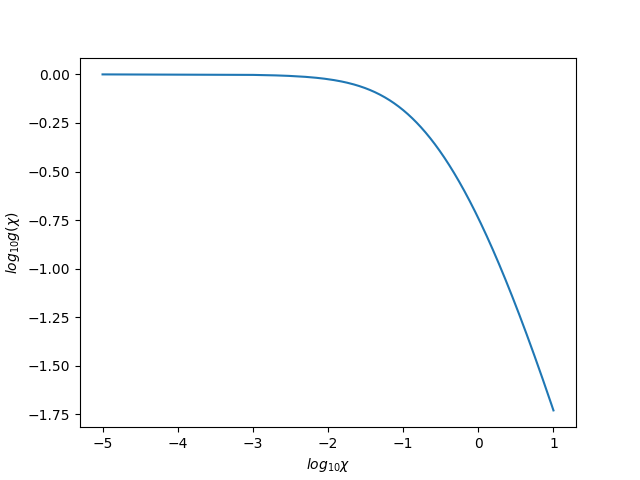

In [6]:
#gráfico de h

plt.plot(np.log10(chi_0), np.log10(h))

plt.ylabel('$log_{10}g(\chi)$')
plt.xlabel('$log_{10}\chi$')

plt.show()

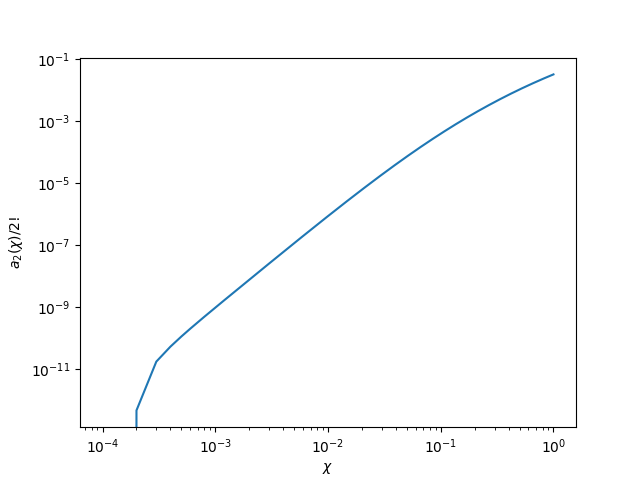

In [7]:
#gráfico de g

plt.plot(chi_1, g*0.5)

plt.ylabel('$a_2(\chi)/2!$')
plt.xlabel('$\chi$')


plt.xscale('log')

plt.yscale('log')


plt.show()